In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [26]:
df = pd.read_csv('10 各地区每日积分流入流出量的总和.csv',encoding='gbk')

In [12]:
# 使用strip()函数去除所有单元格前后的空格
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [13]:
df['FINISHDATE'] = pd.to_datetime(df['FINISHDATE'])

In [16]:
grouped_data = df.groupby('COUNTY_NAME')

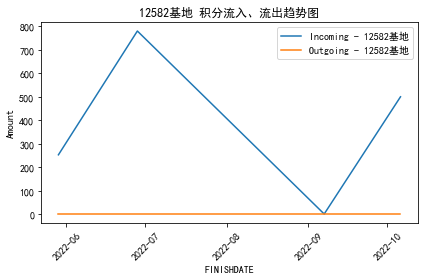

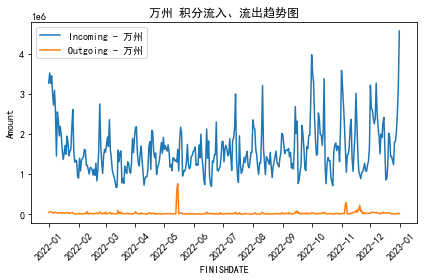

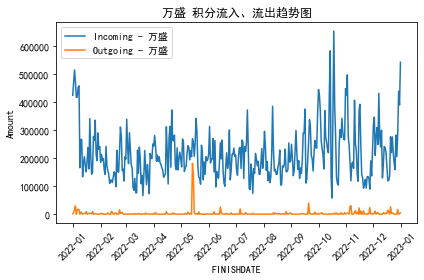

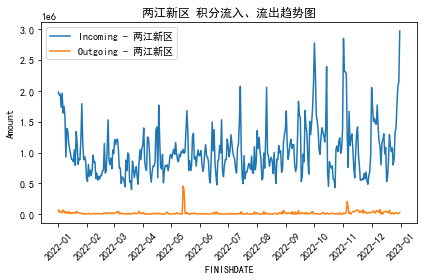

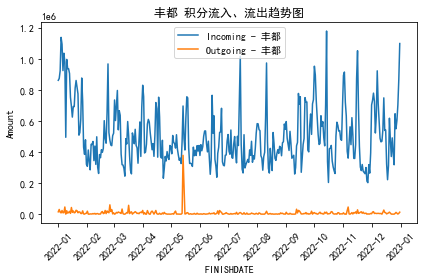

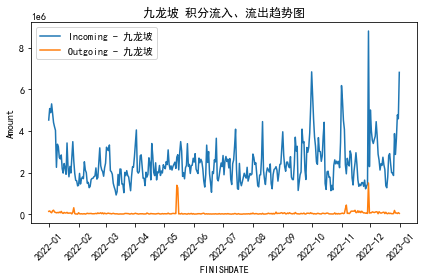

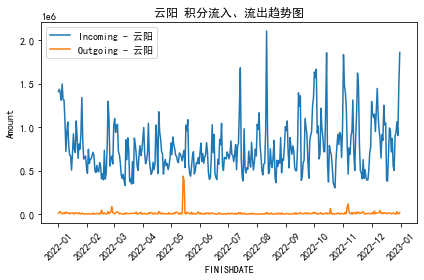

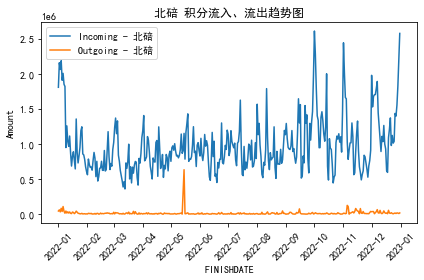

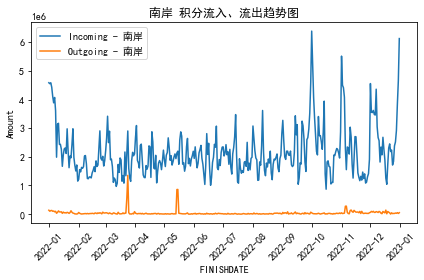

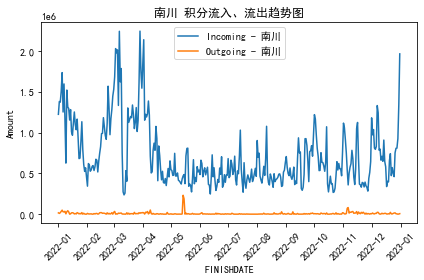

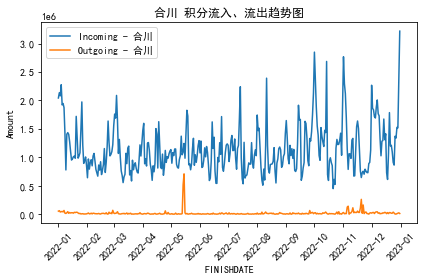

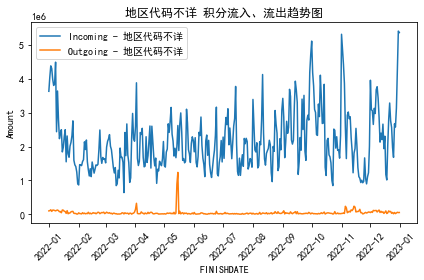

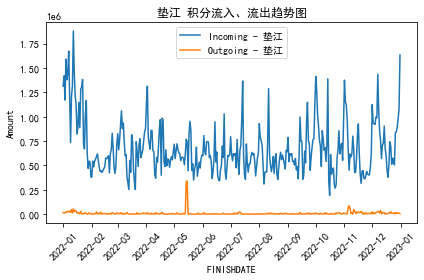

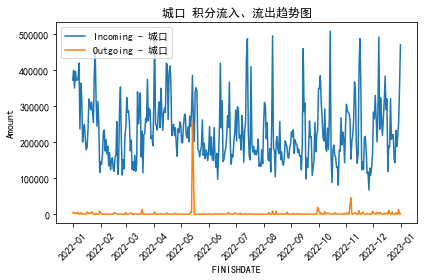

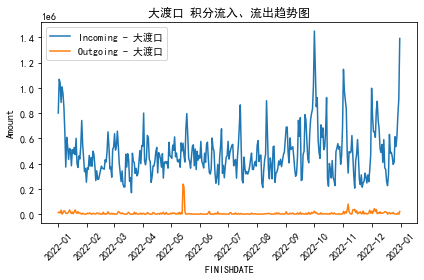

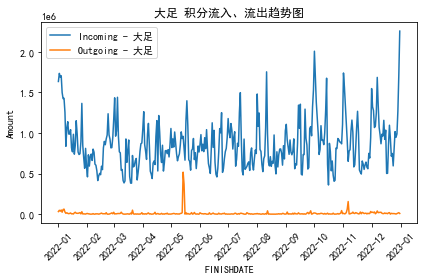

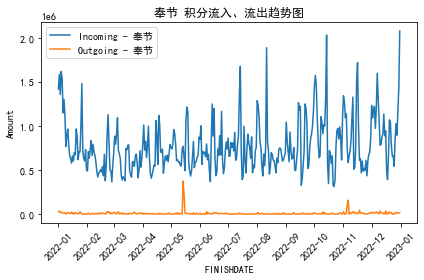

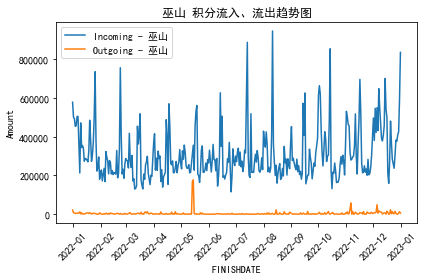

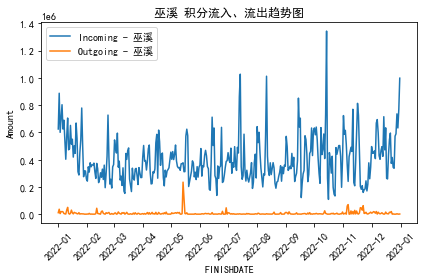

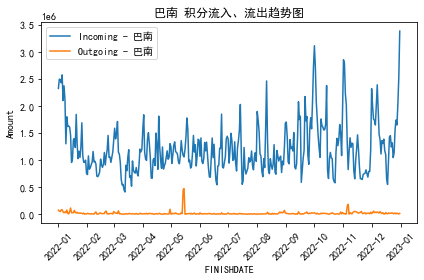

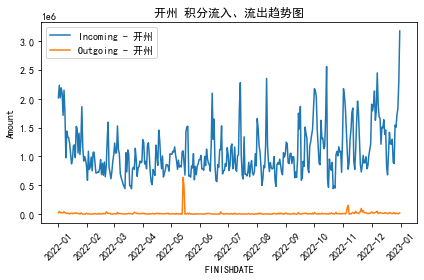

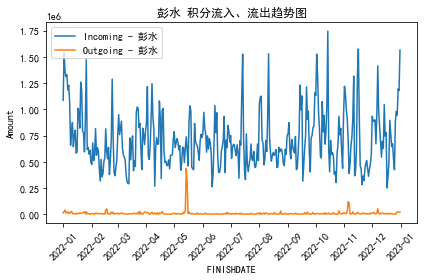

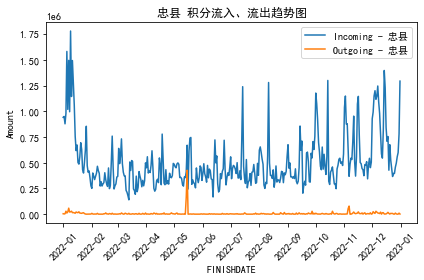

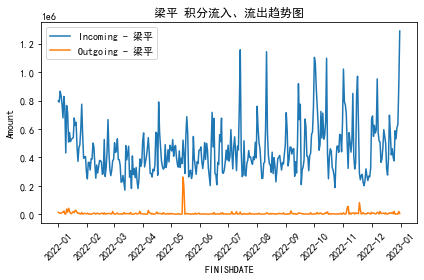

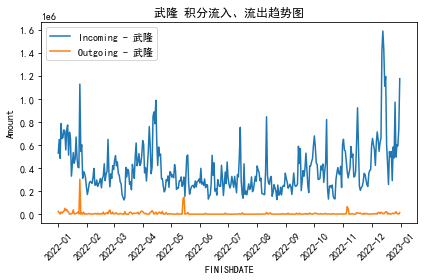

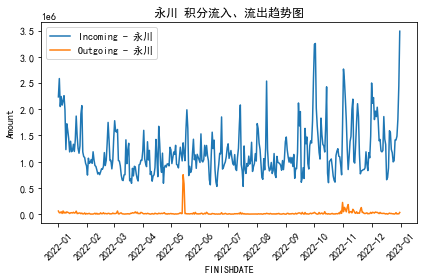

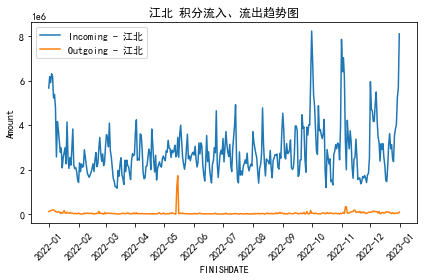

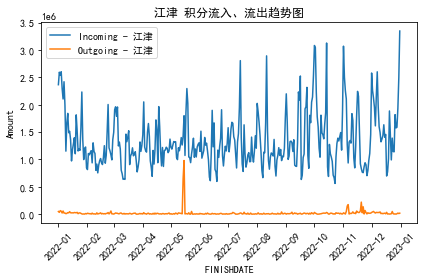

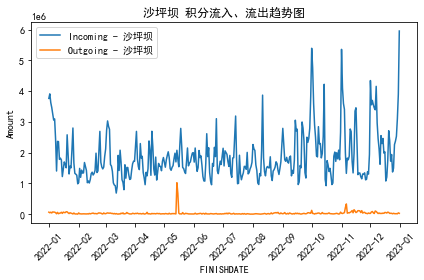

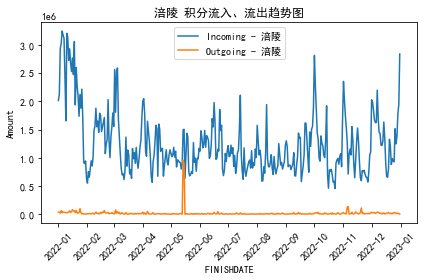

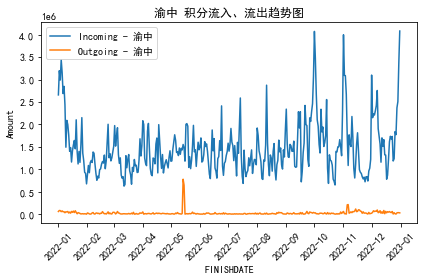

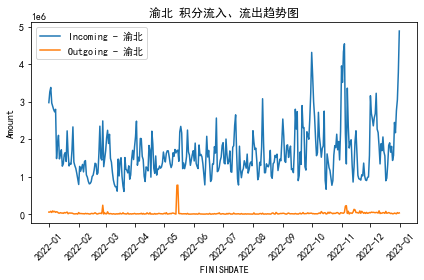

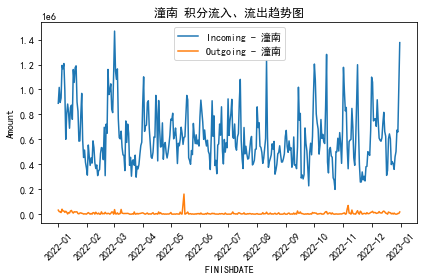

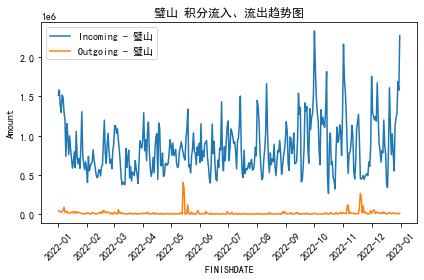

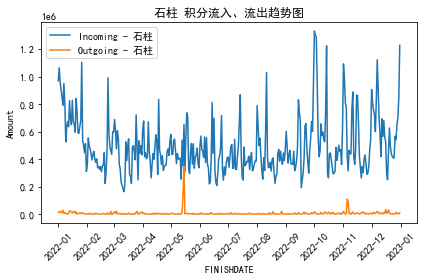

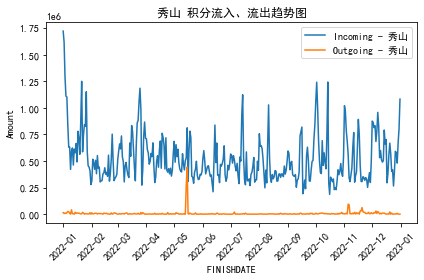

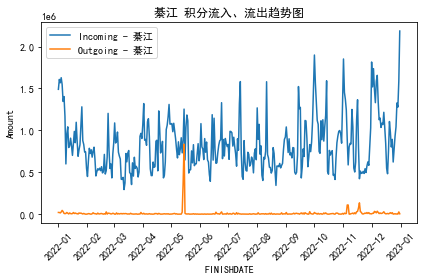

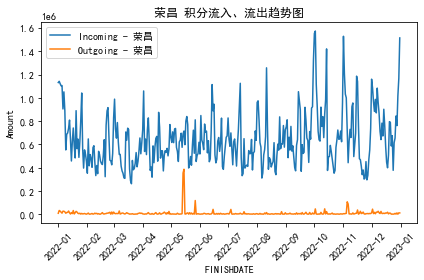

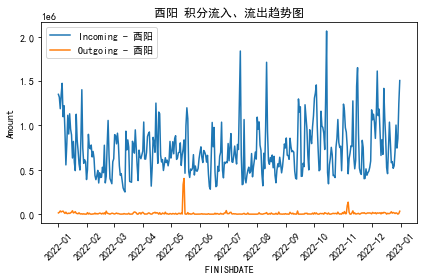

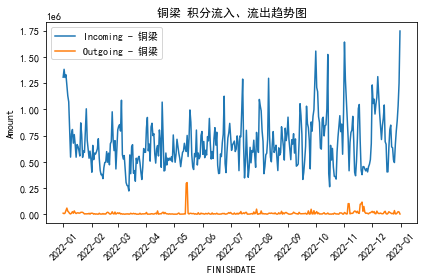

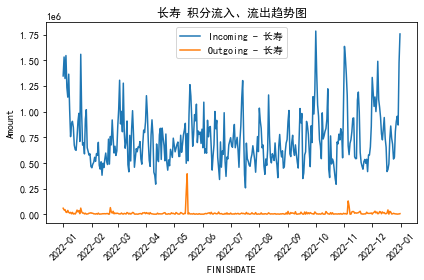

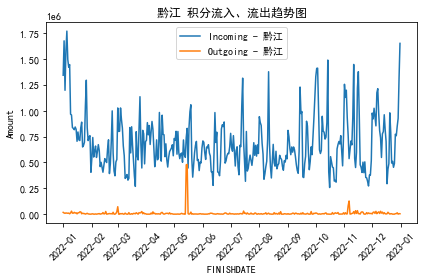

In [25]:
# 绘制折线图
# plt.figure(figsize=(40, 6))
for county_name, data in grouped_data:
    plt.plot(data['FINISHDATE'], data['INCOMING_TOTAL'], label=f'Incoming - {county_name}')
    plt.plot(data['FINISHDATE'], data['OUTGOING_TOTAL'], label=f'Outgoing - {county_name}')

    plt.xlabel('FINISHDATE')
    plt.ylabel('Amount')
    plt.title(f'{county_name} 积分流入、流出趋势图')
    plt.legend()
    # 设置横轴刻度为一周
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    # 保存图表到指定路径下的图片文件
    plt.savefig(f'./10 各地区积分流入流出图/{county_name}.jpg', dpi=300)
    # plt.show()一定要用在最后，因为它会将画布刷新
    plt.show()
